In [5]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [17]:
# define the state of the workflow
class BMIState(TypedDict):
    weight_kg: float  # in kilograms
    height_m: float  # in meters
    bmi: float     # Body Mass Index
    category: str   # BMI category (e.g., Underweight, Normal weight, Overweight, Obesity)

In [11]:
# node functions
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']
    bmi = weight / (height ** 2)

    state['bmi'] = round(bmi, 2)  # round to 2 decimal places
    return state

In [16]:
def label_bmi_category(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        category = 'Underweight'
    elif 18.5 <= bmi < 25:
        category = 'Normal weight'
    elif 25 <= bmi < 30:
        category = 'Overweight'
    else:
        category = 'Obesity'

    state['category'] = category
    return state

In [18]:
# define the graph
graph = StateGraph(BMIState)

# add nodes to your graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_bmi_category', label_bmi_category)

# add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_bmi_category')
graph.add_edge('label_bmi_category', END)

workflow = graph.compile()

In [ ]:
# execute the graph
intial_state = {'weight_kg':80, 'height_m':1.73}

final_state = workflow.invoke(intial_state)
  
print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}


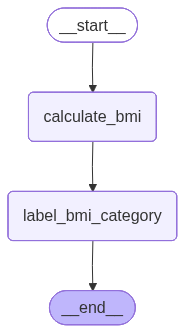

In [20]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())